# Figure Notebook

In [13]:
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
from visualization import *
import dill

In [14]:
plt.rc('legend', fontsize='small')
plt.style.use('bmh')

## Normalisation function

In [15]:
def L2(CM):
    CM_norm = CM / np.sqrt(np.sum(np.square(CM), axis=1, keepdims=True))
    return CM_norm

def maxnorm(CM):
    CM_norm = CM / np.abs(CM.max(axis=1, keepdims=True))
    return CM_norm

def minmax(CM):
    CM_norm = (CM - CM.min(axis=1, keepdims=True)) / (CM.max(axis=1, keepdims=True) - CM.min(axis=1, keepdims=True))
    return CM_norm

def maxmax(CM, alpha=1):
    CM_norm = (CM + alpha * CM.max(axis=1, keepdims=True)) / ((1 + alpha) * CM.max(axis=1, keepdims=True))
    return CM_norm

## Federated Learning

In [16]:
# sizes: [40% 30% 20% 10%]
# label accuracy: [100% 100% 100% 100%]
directory = './saves/FL_n4_r100_25_05_23h42/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['40%', '30%', '20%', '10%']
xlabel = 'Fraction of total dataset'
title = 'Dataset Size'
subscript = 'size'

In [20]:
# sizes: [25% 25% 25% 25%]
# label accuracy: [100% 98% 96% 94%]
directory = './saves/FL_n4_r100_26_05_03h29/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['100%', '98%', '96%', '94%']
xlabel = 'Label Accuracy'
title = 'Label Accuracy'
subscript = 'yacc'

In [21]:
# Dummy set of CMS

#SV = np.random.randn(100,4)/10 + 0.5
#SV[:,1] = SV[:,0] - 0.1
#SV[:,2] = SV[:,0] - 0.2
#SV[:,3] = SV[:,0] - 0.3
#
#SVa = np.random.randn(100,4)/10 + 0.7
#SVa[:,1] = SVa[:,0] - 0.1
#SVa[:,2] = SVa[:,0] - 0.2
#SVa[:,3] = SVa[:,0] - 0.3
#
#ML = np.random.randn(100,4)/10 + 0.6
#ML[:,1] = ML[:,0] - 0.1
#ML[:,2] = ML[:,0] - 0.2
#ML[:,3] = ML[:,0] - 0.3
#
#MLa = np.random.randn(100,4)/10 + 0.8
#MLa[:,1] = MLa[:,0] - 0.1
#MLa[:,2] = MLa[:,0] - 0.2
#MLa[:,3] = MLa[:,0] - 0.3

### Not normalized CMS

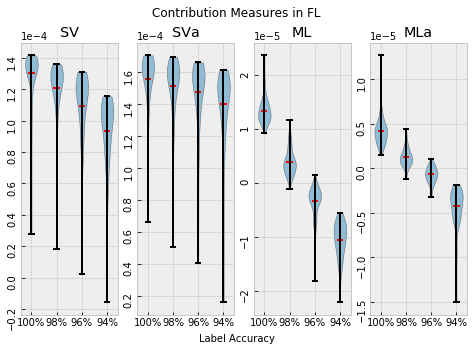

In [22]:
# Parameters
SHOWFLIERS = True
WHIS = [5, 95]

fig, axs = plt.subplots(1 , 4, figsize=(8, 5), sharex=True)

for i in range(4):
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    [tick.set_rotation(90) for tick in axs[i].get_yticklabels()]
# titles
fig.suptitle('Contribution Measures in FL')
axs[0].set_title('SV')
axs[1].set_title('SVa')
axs[2].set_title('ML')
axs[3].set_title('MLa')


# violin plot
parts = {}
parts[0] = axs[0].violinplot(SV, showmeans=True)
parts[1] = axs[1].violinplot(SVa, showmeans=True)
parts[2] = axs[2].violinplot(ML, showmeans=True)
parts[3] = axs[3].violinplot(MLa, showmeans=True)

# boxplot
#axs[0].boxplot(SV, showfliers = SHOWFLIERS, whis = WHIS)
#axs[1].boxplot(SV, showfliers = SHOWFLIERS, whis = WHIS)
#axs[2].boxplot(ML, showfliers = SHOWFLIERS, whis = WHIS)
#axs[3].boxplot(MLa, showfliers = SHOWFLIERS, whis = WHIS)


# x labels
axs[3].set_xticks([1,2,3,4])
axs[3].set_xticklabels(xticklabel)
fig.text(0.5, 0.05, xlabel, ha='center')

# style
for i in range(4):
    for pc in parts[i]['bodies']:
        #pc.set_facecolor('#FAC205')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    parts[i]['cmeans'].set_edgecolor('r')
    parts[i]['cmins'].set_edgecolor('k')
    parts[i]['cmaxes'].set_edgecolor('k')
    parts[i]['cbars'].set_edgecolor('k')
        
# save
plt.savefig('./figures/FL_CMs_' + subscript + '.png')
plt.show()

### Normalized CMS


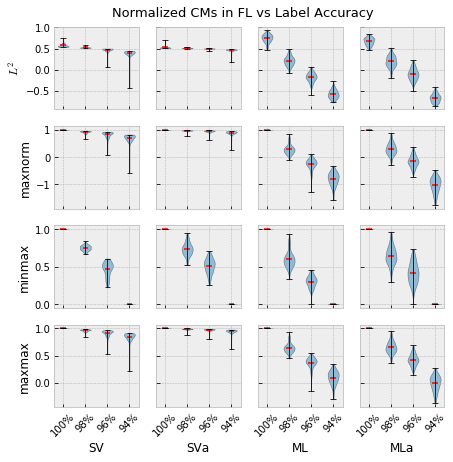

In [23]:
# parameters
SHOWFLIERS = False
WHIS = [0, 100]
SHOWMEANS = True

fig, axs = plt.subplots(4 , 4, figsize=(7, 7), sharex=True, sharey='row')

# title
fig.suptitle('Normalized CMs in FL vs ' + title, y=0.92, fontsize=13)

# Violin plots
parts = {}
parts[0,0] = axs[0,0].violinplot(L2(SV), showmeans=SHOWMEANS)
parts[1,0] = axs[1,0].violinplot(maxnorm(SV), showmeans=SHOWMEANS)
parts[2,0] = axs[2,0].violinplot(minmax(SV), showmeans=SHOWMEANS)
parts[3,0] = axs[3,0].violinplot(maxmax(SV), showmeans=SHOWMEANS)

parts[0,1] = axs[0,1].violinplot(L2(SVa), showmeans=SHOWMEANS)
parts[1,1] = axs[1,1].violinplot(maxnorm(SVa), showmeans=SHOWMEANS)
parts[2,1] = axs[2,1].violinplot(minmax(SVa), showmeans=SHOWMEANS)
parts[3,1] = axs[3,1].violinplot(maxmax(SVa), showmeans=SHOWMEANS)

parts[0,2] = axs[0,2].violinplot(L2(ML), showmeans=SHOWMEANS)
parts[1,2] = axs[1,2].violinplot(maxnorm(ML), showmeans=SHOWMEANS)
parts[2,2] = axs[2,2].violinplot(minmax(ML), showmeans=SHOWMEANS)
parts[3,2] = axs[3,2].violinplot(maxmax(ML), showmeans=SHOWMEANS)

parts[0,3] = axs[0,3].violinplot(L2(MLa), showmeans=SHOWMEANS)
parts[1,3] = axs[1,3].violinplot(maxnorm(MLa), showmeans=SHOWMEANS)
parts[2,3] = axs[2,3].violinplot(minmax(MLa), showmeans=SHOWMEANS)
parts[3,3] = axs[3,3].violinplot(maxmax(MLa), showmeans=SHOWMEANS)


# Boxplots
#axs[0,0].boxplot(L2(SV), showfliers = SHOWFLIERS, whis = WHIS)
#axs[0,1].boxplot(maxnorm(SV), showfliers = SHOWFLIERS, whis = WHIS)
#axs[0,2].boxplot(minmax(SV), showfliers = SHOWFLIERS, whis = WHIS)
#axs[0,3].boxplot(maxmax(SV), showfliers = SHOWFLIERS, whis = WHIS)

#axs[1,0].boxplot(L2(SVa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[1,1].boxplot(maxnorm(SVa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[1,2].boxplot(minmax(SVa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[1,3].boxplot(maxmax(SVa), showfliers = SHOWFLIERS, whis = WHIS)

#axs[2,0].boxplot(L2(ML), showfliers = SHOWFLIERS, whis = WHIS)
#axs[2,1].boxplot(maxnorm(ML), showfliers = SHOWFLIERS, whis = WHIS)
#axs[2,2].boxplot(minmax(ML), showfliers = SHOWFLIERS, whis = WHIS)
#axs[2,3].boxplot(maxmax(ML), showfliers = SHOWFLIERS, whis = WHIS)

#axs[3,0].boxplot(L2(MLa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[3,1].boxplot(maxnorm(MLa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[3,2].boxplot(minmax(MLa), showfliers = SHOWFLIERS, whis = WHIS)
#axs[3,3].boxplot(maxmax(MLa), showfliers = SHOWFLIERS, whis = WHIS)


# y labels
axs[0,0].set_ylabel('$L^2$')
axs[1,0].set_ylabel('maxnorm')
#axs[1,0].set_ylim([-2.5, 1.1])
axs[2,0].set_ylabel('minmax')
axs[3,0].set_ylabel('maxmax')
#axs[3,0].set_ylim([-2.5, 1.1])

# x labels
axs[3,0].set_xticks([1,2,3,4])
axs[3,0].set_xticklabels(xticklabel, rotation=45)

axs[3,1].set_xticks([1,2,3,4])
axs[3,1].set_xticklabels(xticklabel, rotation=45)

axs[3,2].set_xticks([1,2,3,4])
axs[3,2].set_xticklabels(xticklabel, rotation=45)

axs[3,3].set_xticks([1,2,3,4])
axs[3,3].set_xticklabels(xticklabel, rotation=45)

axs[3,0].set_xlabel('SV')
axs[3,1].set_xlabel('SVa')
axs[3,2].set_xlabel('ML')
axs[3,3].set_xlabel('MLa')

# plot style
for i in range(4):
    for j in range(4):
        for pc in parts[i,j]['bodies']:
            #pc.set_facecolor('#FAC205')
            pc.set_edgecolor('black')
            pc.set_alpha(0.5)
        parts[i,j]['cmeans'].set_edgecolor('r')
        parts[i,j]['cmeans'].set_linewidth(1.5)
        parts[i,j]['cmins'].set_edgecolor('k')
        parts[i,j]['cmaxes'].set_edgecolor('k')
        parts[i,j]['cbars'].set_edgecolor('k')
        parts[i,j]['cbars'].set_linewidth(0.8)
        parts[i,j]['cmaxes'].set_linewidth(0.8)
        parts[i,j]['cmins'].set_linewidth(0.8)
        
# save
plt.savefig('./figures/FL_norm_CMs_' + subscript + '.png')
plt.show()